In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from seasonal_behavior_deviation import SeasonalBehaviorDeviation

# Test data is a subset of Traffic data from MN Department of Transportation
# https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#

# CSV settings
path = "./traffic_volume.csv"
sep = ";"
timestamp_col_name = "timestamp"
value_col_name = "traffic_volume"
granularity = "1D"

## Import and Preparation

In [2]:
# import
df = pd.read_csv(path, sep=sep, header=0)

# parse timestamp column
df.loc[:, timestamp_col_name] = pd.to_datetime(df[timestamp_col_name], infer_datetime_format=True)

# keep only the necessary columns: timestamp and value
df = df.filter([timestamp_col_name, value_col_name])

# remove duplicate rows
df = df.drop_duplicates(keep='first')

# set index to timestamp column, required for resampling
df = df.set_index(timestamp_col_name, drop=False)

# apply the given granularity
df = df.resample(granularity, label='right', closed='right').sum()
df

,traffic_volume
timestamp,
2017-09-02,95808
2017-09-03,70631
2017-09-04,65589
2017-09-05,57032
2017-09-06,87387
...,...
2018-09-27,88738
2018-09-28,87890
2018-09-29,93552


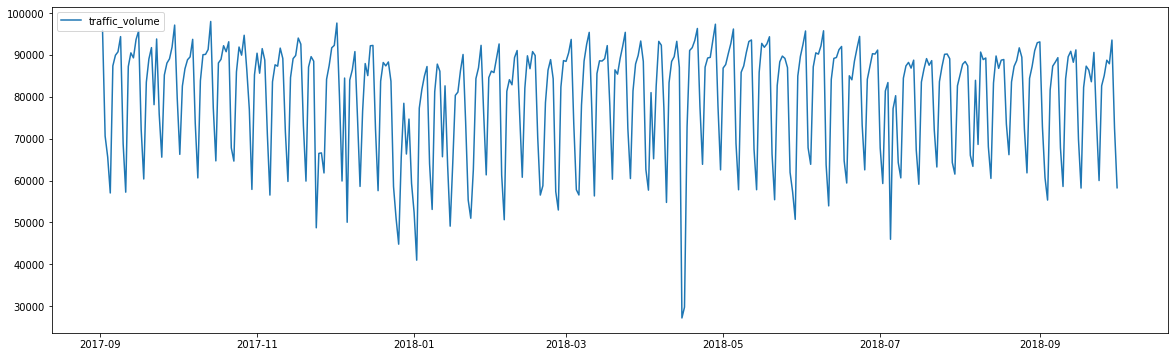

In [3]:
# have a glance at the data
plt.figure(figsize=(20, 6))
plt.plot(df.index, df[value_col_name], label=value_col_name)
plt.legend(loc="upper left")
plt.show()

## Anomaly Detection
The SBD algorithm requires two parameters:
1. season_length (int): The number of rows, which represent one season. For this dataset, we assume a weekly seasonality. Since we chose a resolution of one day, we set "season_length" to 7.
2. window_size (int): This parameter specifies how fine SBD should narrow down the discords.

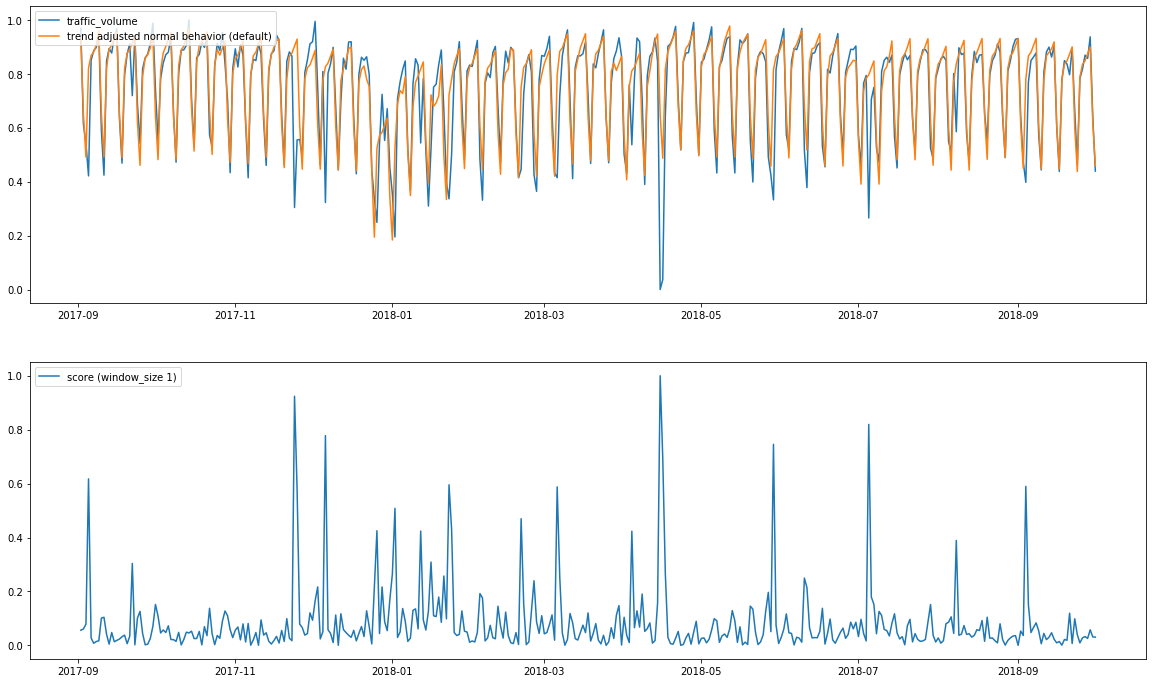

In [4]:
# assuming a weekly seasonality at a resolution of 1 day 
season_length = 7

window_size = 1

fig, (overview_plot, score_plot) = plt.subplots(2, figsize=(20, 12))

anomaly_detector = SeasonalBehaviorDeviation(data=df[value_col_name].tolist(), season_length=season_length, window_size=window_size)
anomaly_detector.detect()
result = anomaly_detector.get_result()
score_plot.plot(df.index, result.scores, label="score (window_size %i)" % window_size)

# plot the original data and the extracted normal_behavior
overview_plot.plot(df.index, result.normalized_data, label=value_col_name)
overview_plot.plot(df.index, result.normal_behavior, label="trend adjusted normal behavior (default)")
overview_plot.legend(loc="upper left")
score_plot.legend(loc="upper left")

plt.show()

## Different Window sizes
With smaller window_size, the anomaly_score vector becomes spikier, and the single anomalies become clear. By choosing higher values, the score curve becomes smoother. Moreover, with greater window_sizes, multiple close anomalies can be summarized to one large anomaly. The default for window_size is 1.

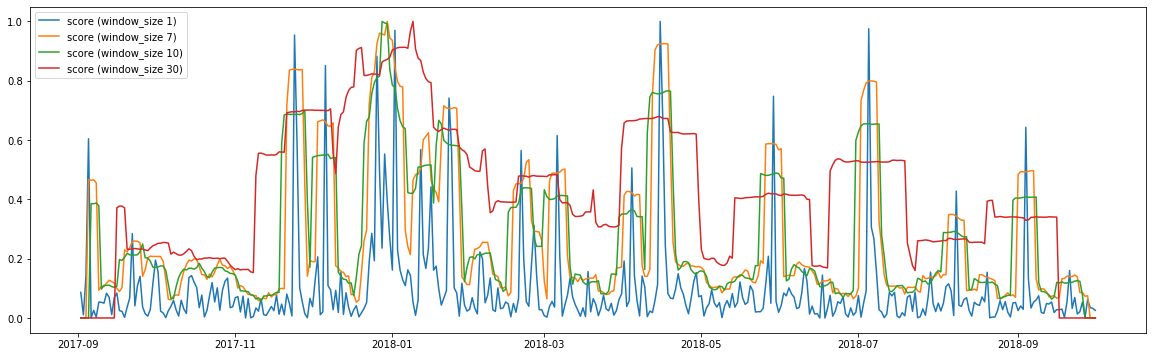

In [5]:
# assuming a weekly seasonality at a resolution of 1 day 
season_length = 7

# multiple window sizes for comparison
window_sizes = [1, 7, 10, 30]

plt.figure(figsize=(20, 6))

for window_size in window_sizes:
    anomaly_detector = SeasonalBehaviorDeviation(data=df[value_col_name].tolist(), season_length=season_length, window_size=window_size, detrend=False)
    anomaly_detector.detect()
    result = anomaly_detector.get_result()
    plt.plot(df.index, result.scores, label="score (window_size %i)" % window_size)

plt.legend(loc="upper left")

plt.show()

## Detrending
Also, you can tell the algorithm to adjust the given values to their trend via the argument "detrend". Default is True.

In [ ]:
# assuming a weekly seasonality at a resolution of 1 day 
season_length = 7

window_size = 1

fig, (overview_plot, score_plot) = plt.subplots(2, figsize=(20, 12))

for detrend_mode in [True, False]:
    anomaly_detector = SeasonalBehaviorDeviation(data=df[value_col_name].tolist(), season_length=season_length, window_size=window_size, detrend=detrend_mode)
    anomaly_detector.detect()
    result = anomaly_detector.get_result()
    score_plot.plot(df.index, result.scores, label="score (window_size %i), detrend=%s" % (window_size, detrend_mode))

    # plot the original data and the extracted normal_behavior
    overview_plot.plot(df.index, result.normal_behavior, label="normal behavior, detrend=%s" % detrend_mode)
    overview_plot.legend(loc="upper left")
    score_plot.legend(loc="upper left")

plt.show()

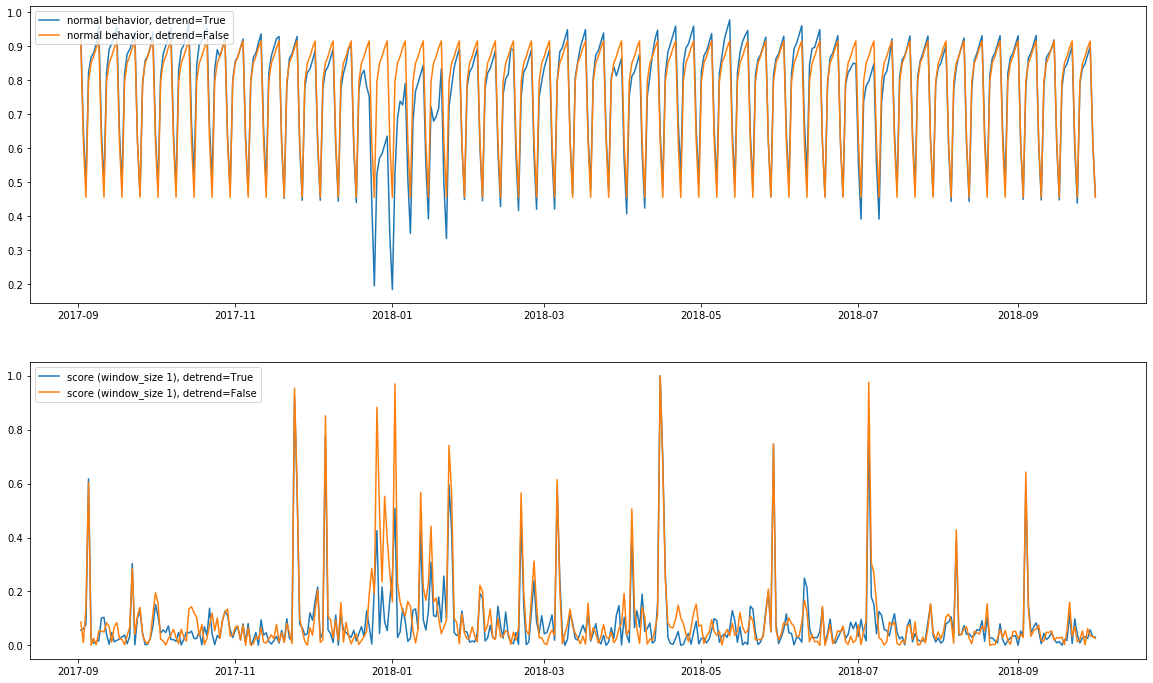

In [6]:
# assuming a weekly seasonality at a resolution of 1 day 
season_length = 7

window_size = 1

fig, (overview_plot, score_plot) = plt.subplots(2, figsize=(20, 12))

for detrend_mode in [True, False]:
    anomaly_detector = SeasonalBehaviorDeviation(data=df[value_col_name].tolist(), season_length=season_length, window_size=window_size, detrend=detrend_mode)
    anomaly_detector.detect()
    result = anomaly_detector.get_result()
    score_plot.plot(df.index, result.scores, label="score (window_size %i), detrend=%s" % (window_size, detrend_mode))

    # plot the original data and the extracted normal_behavior
    overview_plot.plot(df.index, result.normal_behavior, label="normal behavior, detrend=%s" % detrend_mode)
    overview_plot.legend(loc="upper left")
    score_plot.legend(loc="upper left")

plt.show()